In [1]:
#now for third sheet ie tirupati
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import schedules

# Load data from Excel file
data = pd.read_excel('VIJ-VIZ-TIR.xlsx', sheet_name=2)

# Assuming 'totalx' is the target variable to be predicted
target_variable = 'totalx'

# Filter data for the relevant columns and months (3, 4, 5)
filtered_data = data[['d2m', 'blh', 'cp', 'cin','cape', 'kx',"tp",target_variable]].copy()
filtered_data = filtered_data[data['month'].isin([3, 4, 5])]

# Split data into features (X) and target (y)
X = filtered_data[['d2m', 'blh', 'cp', 'cin' , 'cape', 'kx', 'tp']].values
y = filtered_data[target_variable].values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Save the best model during training
checkpoint = ModelCheckpoint('best_nn_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Use early stopping to prevent overfitting and find the optimal number of epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[checkpoint, early_stopping], verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')





2024-02-20 10:44:06.037094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 10:44:06.037196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 10:44:06.038181: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 10:44:06.047322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-20 10:44:07.297477: W tensorflow/compiler/tf2

Epoch 1/200


2024-02-20 10:44:13.195915: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa2a47646d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-20 10:44:13.195970: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-20 10:44:13.200956: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-20 10:44:13.225535: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708406053.325508    8203 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


68/68 [==============================] - ETA: 0s - loss: 320.0623 - mae: 12.9920
Epoch 1: val_loss improved from inf to 47.71393, saving model to best_nn_model.h5
68/68 [==============================] - 5s 17ms/step - loss: 320.0623 - mae: 12.9920 - val_loss: 47.7139 - val_mae: 4.4970
Epoch 2/200
 5/68 [=>............................] - ETA: 0s - loss: 135.1975 - mae: 8.6159

/home/fitzingout/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/68 [============================>.] - ETA: 0s - loss: 148.9754 - mae: 9.3901
Epoch 2: val_loss did not improve from 47.71393
68/68 [==============================] - 1s 13ms/step - loss: 147.6927 - mae: 9.3451 - val_loss: 55.0570 - val_mae: 4.1046
Epoch 3/200
65/68 [===========================>..] - ETA: 0s - loss: 140.4967 - mae: 9.3239
Epoch 3: val_loss improved from 47.71393 to 31.59785, saving model to best_nn_model.h5
68/68 [==============================] - 1s 16ms/step - loss: 139.6487 - mae: 9.2802 - val_loss: 31.5979 - val_mae: 4.2768
Epoch 4/200
65/68 [===========================>..] - ETA: 0s - loss: 102.7585 - mae: 7.7956
Epoch 4: val_loss did not improve from 31.59785
68/68 [==============================] - 1s 15ms/step - loss: 103.1305 - mae: 7.8003 - val_loss: 67.4810 - val_mae: 6.8954
Epoch 5/200
66/68 [============================>.] - ETA: 0s - loss: 95.1510 - mae: 7.5548
Epoch 5: val_loss did not improve from 31.59785
68/68 [==============================] - 1s 1

In [2]:
# Make predictions for new input data
new_d2m = 296.907
new_blh = 461.283
new_cp = 0.0000363533
new_cin = 202.997
new_cape = 1268.34
new_kx = 29.931
new_tp = 0.0000367388


# Create an array with the new input data
new_data = np.array([[new_d2m,new_blh, new_cp, new_cin, new_cape, new_kx, new_tp]])

# Standardize the new input data using the same scaler used during training
new_data = scaler.transform(new_data)  # Standardize the new input data

# Make predictions for the new input data
predicted_totalx = model.predict(new_data)

print(f'Total x: {predicted_totalx[0][0]}')
model.save('tirupatimodel.h5')

1/1 [==============================] - 0s 130ms/step
Total x: 43.8393669128418


/home/fitzingout/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
#error calculation
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2: {r2:.4f}')


# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


22/22 [==============================] - 0s 3ms/step
Mean Squared Error: 7.5783
Mean Absolute Error: 2.1589
R^2: 0.6651


In [4]:
#now lets make a new excel file and there we will put the predicted values input and the actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.to_excel('predictedtirupati.xlsx', index=False)
print(df)
model.summary()


      Actual  Predicted
0    47.3505  48.202255
1    44.2619  44.012959
2    48.8539  46.662895
3    41.9240  39.983177
4    39.6246  38.461803
..       ...        ...
672  47.0852  40.940929
673  37.7878  37.845829
674  41.7528  42.962719
675  43.9274  45.547661
676  43.8867  43.931480

[677 rows x 2 columns]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4096      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout

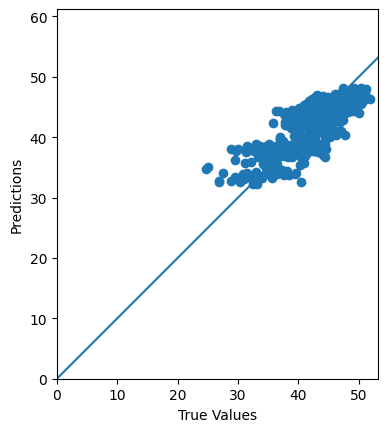

In [5]:
#scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()



# Calculate RMSE for each month
months = [3, 4, 5]
rmse_values = []

for month in months:
    # Filter data for the specific month
    month_data = filtered_data[filtered_data['month'] == month]
    
    # Extract features and target for the month
    X_month = month_data[['d2m', 'blh', 'cp', 'cin', 'cape', 'kx', 'tp']].values
    y_month = month_data[target_variable].values.reshape(-1, 1)
    
    # Standardize features
    X_month = scaler.transform(X_month)
    
    # Make predictions for the month
    y_pred_month = model.predict(X_month)
    
    # Calculate RMSE for the month
    rmse_month = np.sqrt(mean_squared_error(y_month, y_pred_month))
    rmse_values.append(rmse_month)

# Plot RMSE values against months
plt.bar(months, rmse_values, color='blue')
plt.xlabel('Month')
plt.ylabel('RMSE')
plt.title('RMSE Between Months and Total X')
plt.show()
